In [79]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u
TIC = "TIC 95471299"

available_data_all = lk.search_lightcurve(TIC,author='SPOC',exptime = 120);
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,95471299,0.0


C:\Users\bhara\anaconda3\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<IPython.core.display.Javascript object>


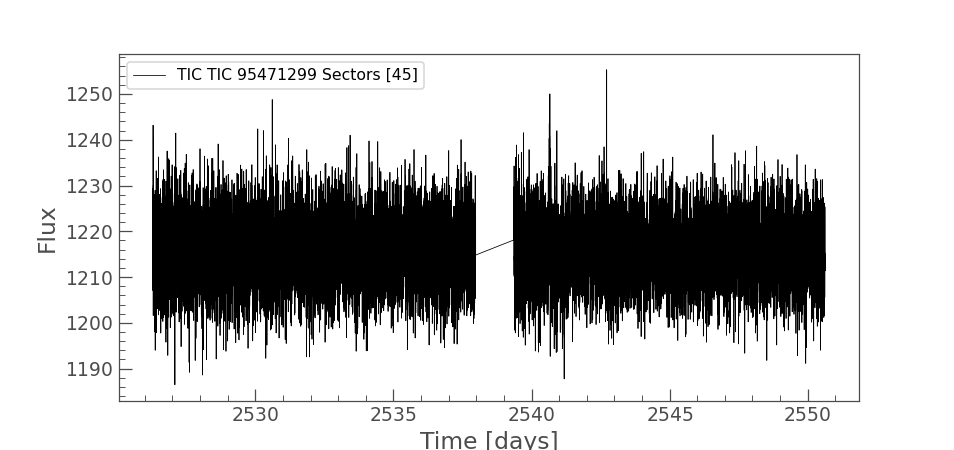

In [80]:
# Define list of sectors to download
sectors = [45]

# Download and concatenate light curves for each sector
lc_all = []
for sector in sectors:
    # Download light curve
    lc = lk.search_lightcurve(TIC, sector=sector).download().remove_nans().remove_outliers(sigma=6)
    # Remove nans
    lc = lc.remove_nans()
    # Append to list
    lc_all.append(lc)

# Concatenate light curves and remove nans
lc_all = lc_all[0].append(lc_all[1:])

# Plot light curves
lc_all.plot(label='TIC '+str(TIC)+' Sectors '+str(sectors), c='k', lw=0.5)

# Add legend and axis labels
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Flux')

# Show plot
plt.show()

<IPython.core.display.Javascript object>


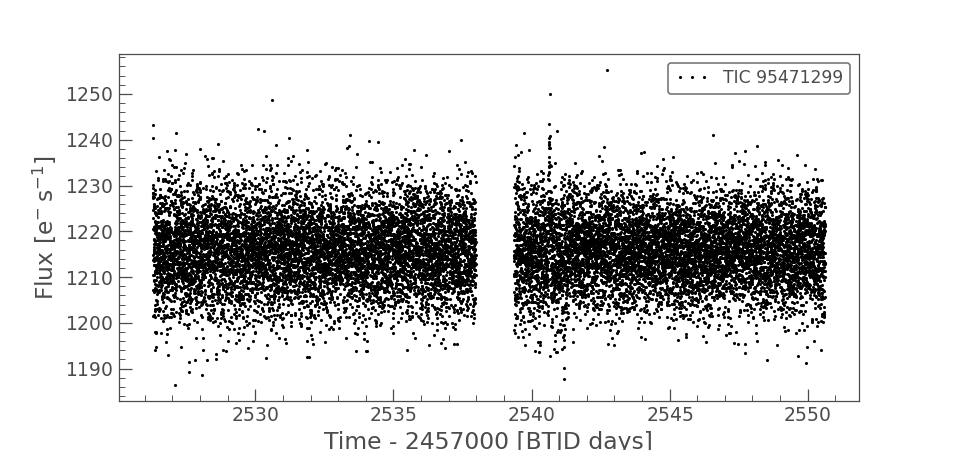

In [81]:
lc_all.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


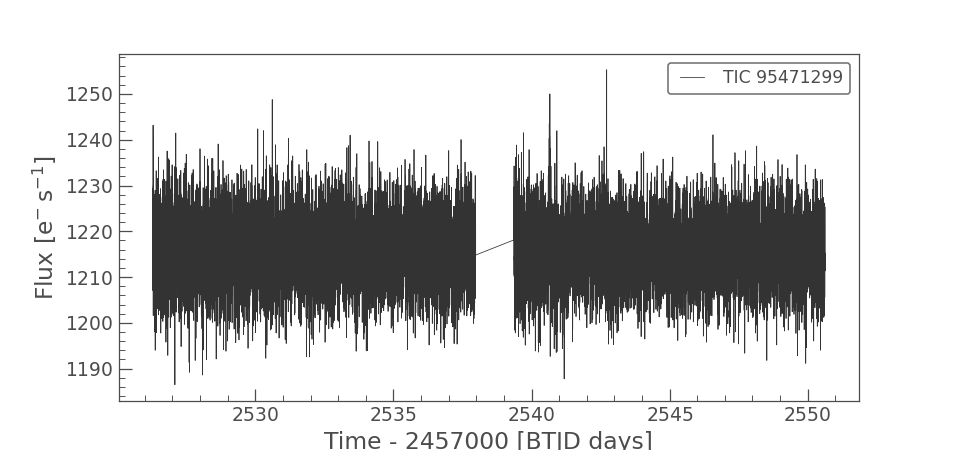

<IPython.core.display.Javascript object>


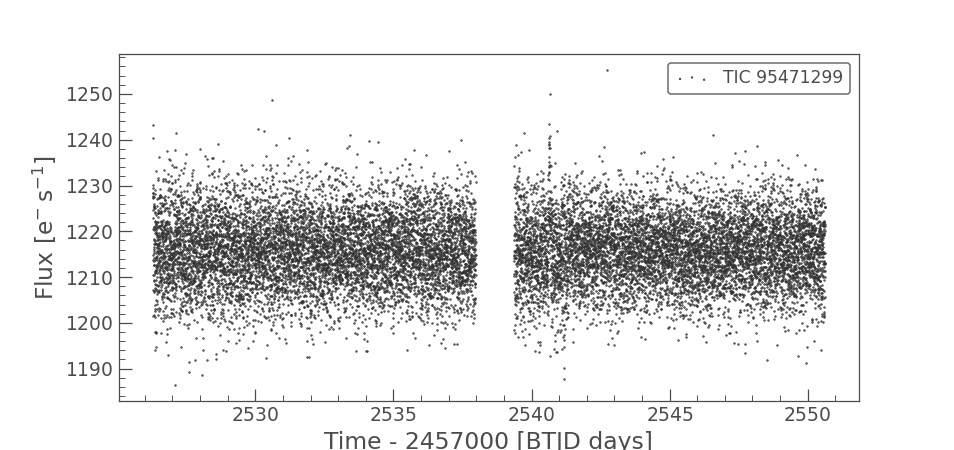

In [82]:
mask = ((lc_all.time.value < 250000)&(lc_all.time.value > 0))
masked_lc=lc_all[mask];
masked_lc.plot();
masked_lc.scatter(s=1);

<IPython.core.display.Javascript object>


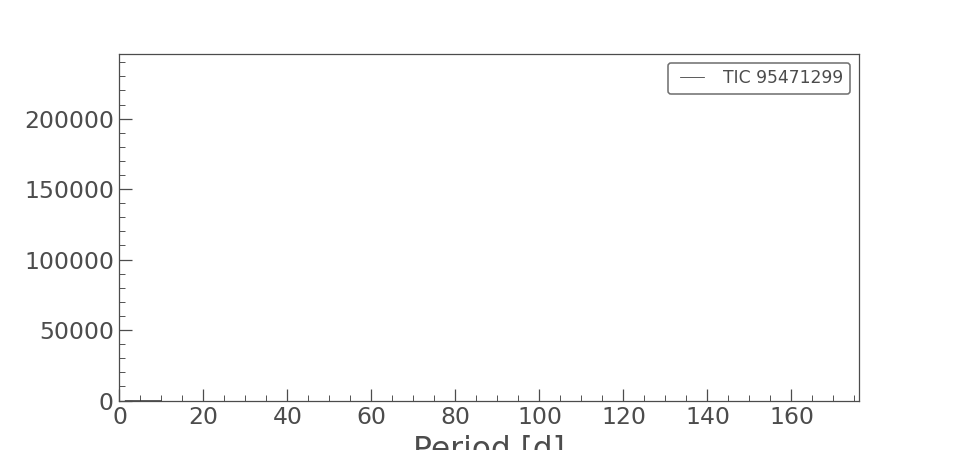

Period at 1th max power = 4.552930930930931375 d
BLS max power = 11.388848
Epoch max power = 2459528.056007
----------------------------------------
Period at 2th max power = 8.264498498498499046 d
BLS max power = 11.379690
Epoch max power = 2459531.991007
----------------------------------------
Period at 3th max power = 4.561522522522523104 d
BLS max power = 11.350018
Epoch max power = 2459527.506007
----------------------------------------
Period at 4th max power = 4.518564564564565345 d
BLS max power = 11.136559
Epoch max power = 2459527.486007
----------------------------------------
Period at 5th max power = 4.286591591591592199 d
BLS max power = 10.919964
Epoch max power = 2459528.181007
----------------------------------------
Period at 6th max power = 8.273090090090091664 d
BLS max power = 10.873798
Epoch max power = 2459531.981007
----------------------------------------
Period at 7th max power = 3.109543543543543898 d
BLS max power = 10.873497
Epoch max power = 2459527.82600

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(1.417,10,1000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 176)
plt.ylim([0, 245894])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(15):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

C:\Users\bhara\anaconda3\Lib\site-packages\lightkurve\lightcurve.py:1043: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


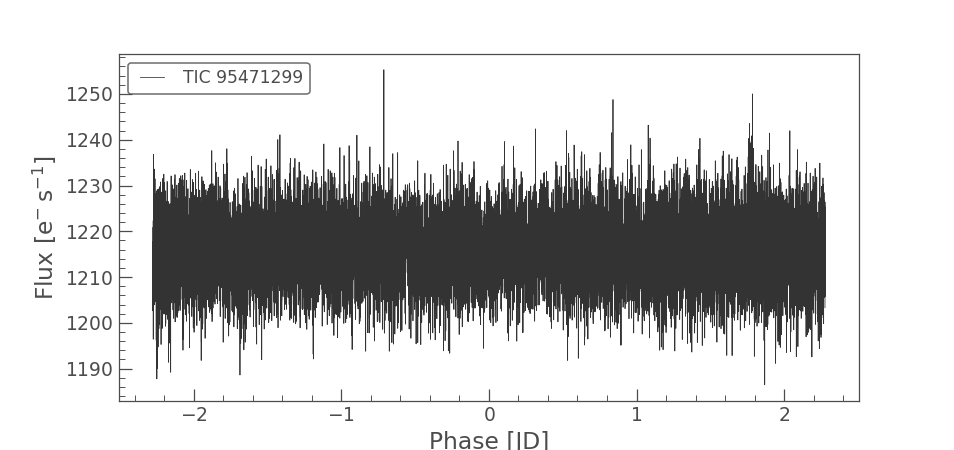

<IPython.core.display.Javascript object>


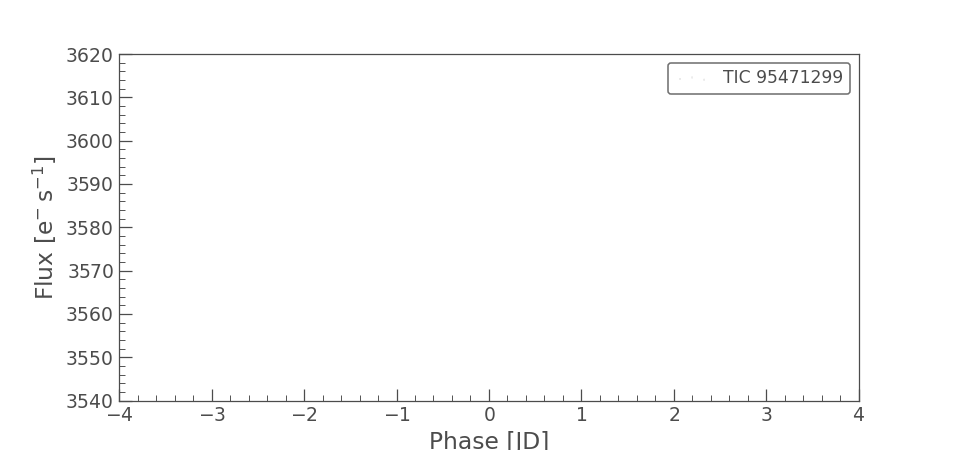

(3540.0, 3620.0)

In [84]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue = 4.552930930930931375
epochtime = 2459528.056007
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=0.01)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-4,4)
plt.ylim([3540,3620])

C:\Users\bhara\anaconda3\Lib\site-packages\lightkurve\lightcurve.py:1043: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


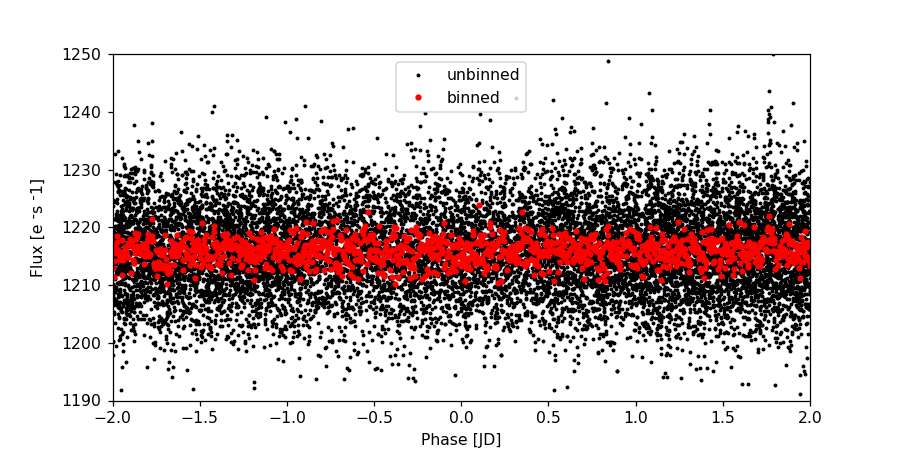

(1190.0, 1250.0)

In [87]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-2,2)
plt.ylim([1190,1250])

In [88]:
min = np.nanmin(folded2_lc_binned.flux).value #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux).value #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('Median flux =', median)
Tdepth = np.abs(median - min)
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  1209.5067138671875
Median flux = 1215.903564453125
Tdepth =  6.3968505859375
Tdepth in ppm =  6396850.5859375 ppm
Rp/Rs ratio =  2.52919959393036


In [89]:
planet_b_period = bls.period_at_max_power.value
planet_b_t0 = bls.transit_time_at_max_power.value
planet_b_dur = bls.duration_at_max_power.value

In [90]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power.value
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  1.9255622797972345
depth in ppm = 1925562.2797972346 ppm


In [91]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

4.552930930930931 d
2528.056006643475
0.1 d


In [92]:
P = period * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 8042388327.985967 m
a = 8042388.327985967 km
a = 0.053760044466206726 AU
The planetary mass was neglected


In [93]:
L = 0.5328872 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if a >=ri and a <=ro:
    print('It is in the Habitable Zone')
else:
    print('It is not in the habitable zone')

Habitable Zone
The inner boundary of the habitable zone ri = 0.6960193309750161 AU
The outer boundary of the habitable zone ro = 1.0027200741831248 AU
It is not in the habitable zone


In [94]:
Rs = 0.76619 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 1349400.684192495 km
Rp= 211.80359193101475 Rearth
Orbital Period and Star Radius ratio
a/Rs = 15.073955076245328


In [95]:
P = 3.8972749727497282 * 24 * 60 * 60
pi = math.pi
a = a #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 150068.69867276473 m/s


In [96]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  4.552930930930931 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  6.3968505859375
Transit depth in ppm =  6396850.5859375 ppm
Transit Depth from bls model in ppm = 1925562.2797972346 ppm
Rp/Rs ratio =  2.52919959393036
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 1349400.684192495 km
Rp= 211.80359193101475 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 8042388327.985967 m
a = 8042388.327985967 km
a = 0.053760044466206726 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 15.073955076245328
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 150068.69867276473 m/s
- - - - - - - - - - - - - - - - - - - - 
